# Tutorial 03 in class exercises (randomization and bootstrapping)

In [2]:
import numpy as np
from scipy import stats  # has t-tests and other stats stuff...
import matplotlib.pyplot as plt

# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## Part I: Start with some data, first plot it, then compute summary stats (mean, std) for each array, and then compute the correlation coeffecient that relates the two arrays, and the t-value and p-value associated with the correlation. Try to do this without copying from the in-class tutorial! (you can peek if you get stuck, but its good practice to just hack it out)
[source of data set: Anscombe](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

In [3]:
d1 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
d2 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

## plot data...scatter works well here

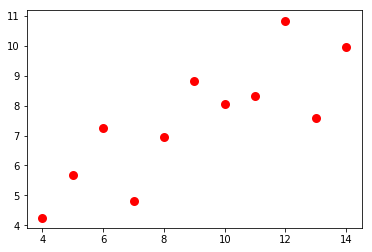

In [10]:
# first plot the data! always do this first
plt.scatter(d1,d2,color='r',marker='o',linewidths=3)
plt.show()

## compute mean, std of first and second data sets 

In [19]:
# compute mean, std for the first data set
mean_data = np.mean(d1, axis=0)
std_data = np.std(d1, axis=0)
print('mean: ', mean_data, ' std: ', std_data)

# compute mean, std for the second data set
mean_data = np.mean(d2, axis=0)
std_data = np.std(d2, axis=0)
print('mean of 2nd: ', mean_data, ' std of 2nd: ', std_data)

mean:  9.0  std:  3.1622776601683795
mean of 2nd:  7.500909090909093  std of 2nd:  1.937024215108669


## correlate the two sets of numbers, compute t-value and p-value associated with correlation coef

In [24]:
# correlation coeffecient
N = len(d1)

corr = np.corrcoef(d1,d2)[0,1]
print('Correlation coef: ', corr)

# compute the t-value/p-value corresponding to the correlation
t_val = (corr*np.sqrt(N-2)) / np.sqrt(1-corr**2)
p_value = 2*(1-stats.t.cdf(t_val, N-1))
print('T value: ', t_val, 'P Value: ', p_value)

Correlation coef:  0.81642051634484
T value:  4.241455288892834 P Value:  0.001712478019544772


## use randomization testing to eval the reliability of the estimated p-value. Before you run this procedure, you should have a pretty good idea of the outcome given that you've plotted the data...make a prediction

Randomization-based p-value:  0.03  Parametric P-value:  0.00171248


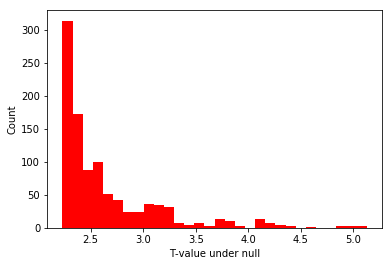

In [27]:
# figure out how many times we want to run the randomization test...
num_randomizations = 1000
rand_corr = np.zeros(num_randomizations)
rand_t_val = np.zeros(num_randomizations)
tmp0 = np.zeros(N)
tmp1 = np.zeros(N)

# start a loop over randomization iterations
for i in np.arange(num_randomizations):
    
    # write this out explicitly for clarity - randomly assigning numbers from d1 or d2
    # i.e. condition doesn't matter. 
    for j in np.arange(N):   
        if np.random.rand(1) < .5:
            tmp0[j] = d1[j]
            tmp1[j] = d2[j]
        else:
            tmp0[j] = d2[j]
            tmp1[j] = d1[j]

    # then correlate the two randomized data vectors...compute tvalues
    rand_corr[i] = np.corrcoef(tmp0,tmp1)[0,1]
    rand_t_val[i] = (rand_corr[i]*np.sqrt(N-2)) / np.sqrt(1-rand_corr[i]**2)

# compute the p-value of our real t-score (t_val) vs our radomized distribution
rand_p_value = 2*(1-(np.sum(t_val>rand_t_val) / num_randomizations))
print('Randomization-based p-value: ', np.round(rand_p_value,8), ' Parametric P-value: ', np.round(p_value,8))

# plotting the distribution of p-values that we observe under the null
plt.hist(rand_t_val, color='r', alpha=1, bins=30)
plt.xlabel('T-value under null')
plt.ylabel('Count')
plt.show()

## Part II: Here is a second data set (actually, its another part of the first data set...but lets pretend like its an entirely new data set)

In [28]:
d1 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
d2 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

## Break the first rule of data analysis, and BEFORE you plot the data, compute the mean and std of these two arrays - what do you notice when you compare them to the mean and std of the arrays in the first part of the exercises?

In [29]:
# compute mean, std for the first data set
mean_data = np.mean(d1, axis=0)
std_data = np.std(d1, axis=0)
print('mean: ', mean_data, ' std: ', std_data)

# compute mean, std for the second data set
mean_data = np.mean(d2, axis=0)
std_data = np.std(d2, axis=0)
print('mean of 2nd: ', mean_data, ' std of 2nd: ', std_data)

mean:  9.0  std:  3.1622776601683795
mean of 2nd:  7.500909090909091  std of 2nd:  1.9360806451340837


## Based only on your comparison of the mean and std between the data from Part I and the data from Part II, what is your prediction about the effects of randomization testing? 

## Ok - now plot the data

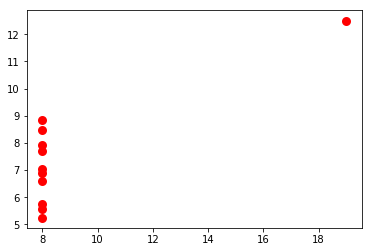

In [30]:
# first plot the data! always do this first
plt.scatter(d1,d2,color='r',marker='o',linewidths=3)
plt.show()

## Based on this, what do you think is going to happen when we compare the output from a parametric test and a radomization test? Remember that the mean and the std of the data sets in Part I and Part II are identical...Compute correlation coef, and do randomization testing

In [31]:
# correlation coeffecient
N = len(d1)

corr = np.corrcoef(d1,d2)[0,1]
print('Correlation coef: ', corr)

# compute the t-value/p-value corresponding to the correlation
t_val = (corr*np.sqrt(N-2)) / np.sqrt(1-corr**2)
p_value = 2*(1-stats.t.cdf(t_val, N-1))
print('T value: ', t_val, 'P Value: ', p_value)

Correlation coef:  0.8165214368885028
T value:  4.243028188591634 P Value:  0.0017082247651687421


## Compare the correlation coeffecients to those from Part I. Far out! So far, everything is pretty much the same between the data sets (same mean/std/corr coef), so should randomization testing yield about the same results? Try it...

Randomization-based p-value:  0.37  Parametric P-value:  0.00170822


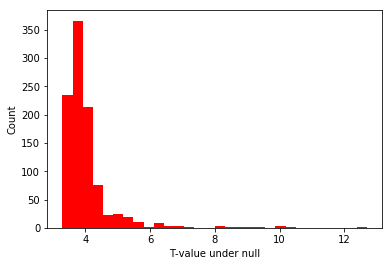

In [33]:
# figure out how many times we want to run the randomization test...
num_randomizations = 1000
rand_corr = np.zeros(num_randomizations)
rand_t_val = np.zeros(num_randomizations)
tmp0 = np.zeros(N)
tmp1 = np.zeros(N)

# start a loop over randomization iterations
for i in np.arange(num_randomizations):
    
    # write this out explicitly for clarity - randomly assigning numbers from d1 or d2
    # i.e. condition doesn't matter. 
    for j in np.arange(N):   
        if np.random.rand(1) < .5:
            tmp0[j] = d1[j]
            tmp1[j] = d2[j]
        else:
            tmp0[j] = d2[j]
            tmp1[j] = d1[j]

    # then correlate the two randomized data vectors...compute tvalues
    rand_corr[i] = np.corrcoef(tmp0,tmp1)[0,1]
    rand_t_val[i] = (rand_corr[i]*np.sqrt(N-2)) / np.sqrt(1-rand_corr[i]**2)

# compute the p-value of our real t-score (t_val) vs our radomized distribution
rand_p_value = 2*(1-(np.sum(t_val>rand_t_val) / num_randomizations))
print('Randomization-based p-value: ', np.round(rand_p_value,8), ' Parametric P-value: ', np.round(p_value,8))

# plotting the distribution of p-values that we observe under the null
plt.hist(rand_t_val, color='r', alpha=1, bins=30)
plt.xlabel('T-value under null')
plt.ylabel('Count')
plt.show()

## Part III: Load in the second EEG data set from last week (eeg_data01.npz). Pull out the data, sr, and tx arrays

In [34]:
# load the data...
eeg = np.load('eeg_data01.npz')

# get the different arrays like this...kind of like a structure in matlab. 
eeg['data']
eeg['sr']
eeg['tx']

# and can query the attributes of the data like this...which will tell us that there 1600 trials and 4102 timepoints per trial sampled
# at 1024Hz
print('Shape of the big eeg data set: ', eeg['data'].shape)
print('Sample rate: ', eeg['sr'])

# and if you want to save some typing, especially because we only have a few variables, you reassign the different arrays like this
data = eeg['data']
sr = eeg['sr']
tx = eeg['tx']

Shape of the big eeg data set:  (1600, 4102)
Sample rate:  1024


## below is a new vector that labels each trial as coming from condition 1 (1) or condition 2 (-1)

In [89]:
N = data.shape[0]
num_samples_per_condition = int(N/2)
cond = np.hstack((np.ones(num_samples_per_condition), np.ones(num_samples_per_condition)*-1))

## Now Avg the data from condition 1, avg the data from condition 2, and plot against the time axis (tx)

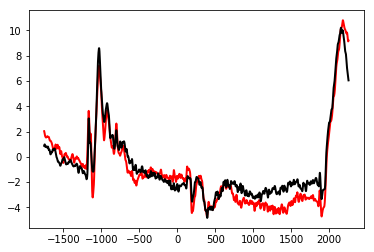

In [90]:
avg1 = np.mean(data[cond==1,:], axis=0)
avg2 = np.mean(data[cond==-1,:], axis=0)

plt.plot(tx, avg1, color='r', linewidth=2)
plt.plot(tx, avg2, color='k', linewidth=2)
plt.show()

## Next do a t-test for related samples comparing the responses in conditions 1 and 2 at each point in time. Note - you can do this all in one line of code!

In [91]:
t_test = stats.ttest_rel(data[cond==1,:],data[cond==-1,:],axis=0)

## now plot the averages in one plot, and then right below that make another plot with the t-values. Keep in mind that with this many degrees of freedom, a t-value of approx 2 is significant at the magic 0.05 level. So put some horizontal lines on the plot at 2 and -2. You'll see some pretty impressive t-values in the data!

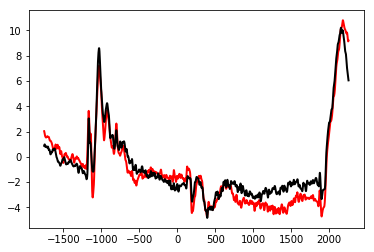

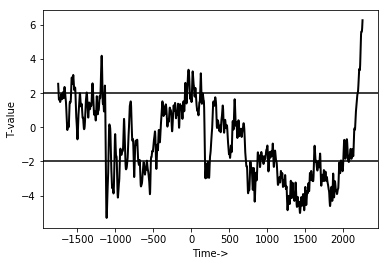

In [120]:
avg1 = np.mean(data[cond==1,:], axis=0)
avg2 = np.mean(data[cond==-1,:], axis=0)

plt.plot(tx, avg1, color='r', linewidth=2)
plt.plot(tx, avg2, color='k', linewidth=2)
plt.show()

plt.plot(tx, t_test.statistic, color='k', linewidth=2)
plt.axhline(2, color='k')
plt.axhline(-2, color='k')
plt.xlabel('Time->')
plt.ylabel('T-value')
plt.show()

## You should see that there is a significant difference at many timepoints...Now figure out how robust those effects are by applying bootstrapping 
* To do this, you might first create two 800 x 4102 matrices, one with data from all trials of condition 1, and one with data from all trials of condition 2
* Then resample 800 trials, with replacement, from each data matrix and then do the t-test. 
* try generating a set of 800 values with repeating numbers that you can use for a row index into the data matrices
* repeat and then compute CIs of the t-value
* how often do the CIs for the t-value overlap with 0???
* note - this can take a while, so start with 50 bootstraps and then increase as compute time allows

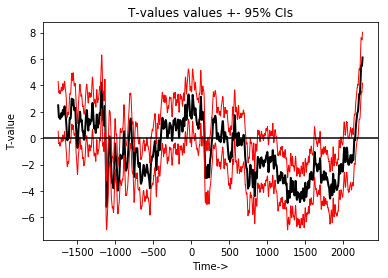

In [124]:
# data matrices
d1 = data[cond==1,:]
d2 = data[cond==-1,:]

# number of bootstraps
num_bootstraps = 1000
boot_t_val = np.zeros((num_bootstraps,data.shape[1]))

# bootstrapping loop...
for i in np.arange(num_bootstraps):
    # with replacement generate a sample number from 0:N exclusive and do that N times
    index1 = np.random.randint(num_samples_per_condition, size=num_samples_per_condition)
    index2 = np.random.randint(num_samples_per_condition, size=num_samples_per_condition)

    # use that to pull data from each of our arrays
    tmp1 = d1[index1,:]
    tmp2 = d2[index2,:]  
    
    # compute t-test between first two vectors. 
    tmp_t_stats = stats.ttest_rel(tmp1, tmp2, axis=0)
    boot_t_val[i,:] = tmp_t_stats.statistic
    
# then compute 95% CIs based on percentiles 
CI = np.percentile(boot_t_val, [2.5, 97.5], axis=0)

# plot
plt.title('T-values values +- 95% CIs')
plt.plot(tx, np.mean(boot_t_val, axis=0), color='k', linewidth=2)
plt.plot(tx, CI[0,], color='r', linewidth=1)
plt.plot(tx, CI[1,], color='r', linewidth=1)
plt.axhline(0, color='k')
plt.xlabel('Time->')
plt.ylabel('T-value')
plt.show()

## How do things compare?